In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
sample_submission_kf = pd.read_csv("../input/kfold3-ashrae/withoutimealign_3foldwith_leakdata_lgb.csv")
sample_submission_meter = pd.read_csv("../input/meter-type-training1/meter_type_training1.csv")
sample_submission_site = pd.read_csv("../input/site-meter-training-lgb1/site-meter-predictions16.csv")

In [3]:
sample_submission = pd.read_feather("../input/ashrae-feather-format-for-fast-loading/sample_submission.feather")

In [4]:
sample_submission["meter_reading"] = 0.3*sample_submission_kf["meter_reading"]+0.3*sample_submission_meter["meter_reading"]+0.3*sample_submission_site["meter_reading"]

In [5]:
sample_submission

,row_id,meter_reading
0,0,158.660899
1,1,61.406235
2,2,7.616704
3,3,144.094899
4,4,1029.534740
...,...,...
41697595,41697595,4.509266
41697596,41697596,3.450419
41697597,41697597,4.295667
41697598,41697598,147.786684


In [6]:
sample_submission['meter_reading'] = np.clip(sample_submission['meter_reading'], a_min=0, a_max=None)
sample_submission['meter_reading'] = sample_submission['meter_reading'].astype('float32')
sample_submission['row_id'] = sample_submission['row_id'].astype('int32')

In [7]:
sample_submission.to_csv('ensemble_ashrae.csv',index=False) 

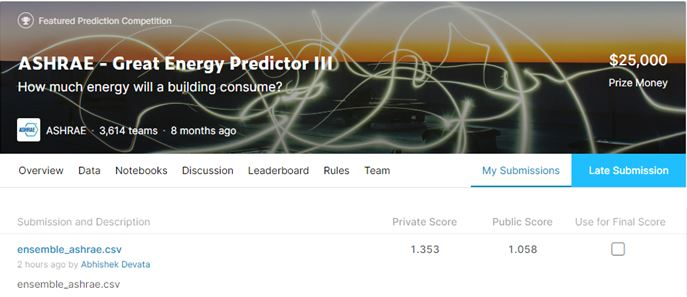

In [1]:
from IPython.display import Image
Image(filename='ensemble.JPG')                  